<a href="https://colab.research.google.com/github/atikhasan007/Computer-Vision/blob/main/Image_classification_vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!nvidia-smi

Fri Jan 30 21:02:17 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   38C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [5]:

!unzip /content/Bones-data.zip

Archive:  /content/Bones-data.zip
   creating: Bones-data/
   creating: Bones-data/test/
   creating: Bones-data/test/Oblique fracture/
  inflating: Bones-data/test/Oblique fracture/0-_gallery_jpeg.rf.b3170266ea6b6d03bfb4ae5991df98ce.jpg  
  inflating: Bones-data/test/Oblique fracture/10-1055-b-002-85516_c023_f003-1_jpg.rf.a2cb46deb0263fc9290f45ee328c632.jpg  
  inflating: Bones-data/test/Oblique fracture/10-1055-b-002-85516_c023_f003-1_jpg.rf.a2cb46deb0263fc92980f45ee328c632.jpg  
  inflating: Bones-data/test/Oblique fracture/1000_F_264769365_u927dRxrrx1fi4rlR1VWif9LcGeJwv4h_jpg.rf.b2d149cb90da63cbc49ec73e82bf0935.jpg  
  inflating: Bones-data/test/Oblique fracture/119913828-radiography-with-oblique-fibula-fracture_jpg.rf.8f0f4e48c3c959ca7b930e3cba8fafd0.jpg  
  inflating: Bones-data/test/Oblique fracture/220px-MalletFinger-PNG_jpg.rf.8eb8b19e344b2ab4d48b4cbeda7b4a80.jpg  
  inflating: Bones-data/test/Oblique fracture/2624240dc461d0c5d2d7fb7e16b3065c_jpg.rf.628b0bc8b7bb91626b4835d7b36

In [6]:

# re-size all the images to this
IMAGE_SIZE = [224, 224]


In [7]:

size = [224, 224] + [3]
size

[224, 224, 3]

In [8]:

train_path = '/content/Bones-data/train'
valid_path = '/content/Bones-data/test'

In [9]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import numpy as np
from glob import glob
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten

In [10]:
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3],  weights='imagenet', include_top=False)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [11]:
for layer in vgg16.layers:
  print(layer.trainable)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [12]:
for layer in vgg16.layers:
    layer.trainable = False

In [13]:
for layer in vgg16.layers:
  print(layer.name,layer.trainable)


input_layer False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [14]:
vgg16.summary()



Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [15]:

folders = glob('/content/Bones-data/train/*')
folders

['/content/Bones-data/train/Oblique fracture',
 '/content/Bones-data/train/Spiral Fracture']

In [16]:

num_of_class = len(folders)
num_of_class

2

In [17]:
model = Sequential()
model.add(vgg16)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(num_of_class,activation='softmax'))

In [18]:

# view the structure of the model
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,137,986 (80.64 MB)

 Trainable params: 6,423,298 (24.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [19]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [20]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [21]:

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [22]:

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 143 images belonging to 2 classes.


In [23]:

test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 28 images belonging to 2 classes.


In [24]:

r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 35s 5s/step - accuracy: 0.5300 - loss: 4.9263 - val_accuracy: 0.4286 - val_loss: 2.0176
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 409ms/step - accuracy: 0.5097 - loss: 1.1824 - val_accuracy: 0.6786 - val_loss: 0.7615
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 421ms/step - accuracy: 0.6750 - loss: 0.6464 - val_accuracy: 0.6071 - val_loss: 0.8230
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 422ms/step - accuracy: 0.7484 - loss: 0.4877 - val_accuracy: 0.5357 - val_loss: 0.7478
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 577ms/step - accuracy: 0.8201 - loss: 0.3734 - val_accuracy: 0.5714 - val_loss: 0.8046
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 405ms/step - accuracy: 0.8878 - loss: 0.2954 - val_accuracy: 0.5000 - val_loss: 0.8471
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 415ms/step - accuracy: 0.9052 - loss: 0.3107 - val_accuracy: 0.5357 - val_loss: 0.8172
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 434ms/step - accuracy: 0.9399 - loss: 0.2219 - val_accuracy: 0.5714 - val_loss: 0

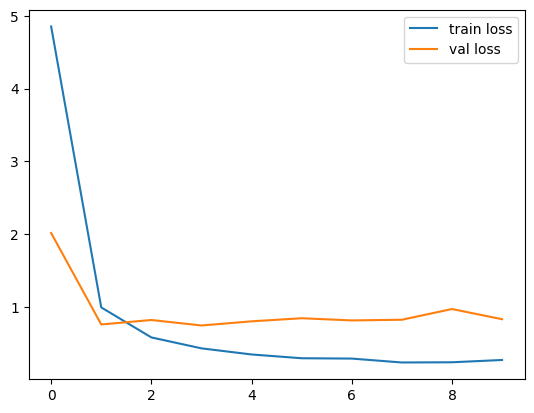

<Figure size 640x480 with 0 Axes>

In [25]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

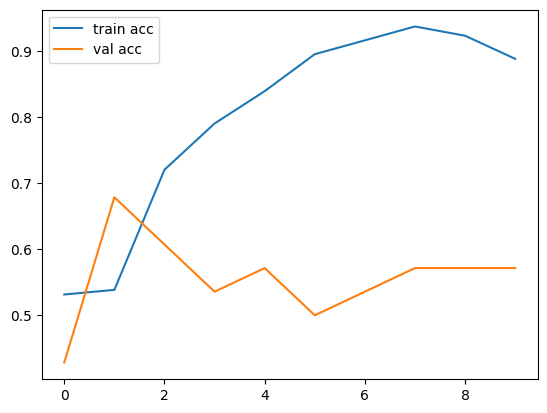

<Figure size 640x480 with 0 Axes>

In [26]:

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [27]:

model.evaluate(test_set)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - accuracy: 0.5714 - loss: 0.8338


[0.8338432312011719, 0.5714285969734192]

In [28]:
from tensorflow.keras.models import load_model

model.save('model_vgg16.h5')

In [29]:
model = load_model("model_vgg16.h5")

In [30]:

from tensorflow.keras.preprocessing import image

In [31]:
img = "/content/Bones-data/test/Oblique fracture/43390tn_jpg.rf.e82c12a328a56cc66d5d828e638324be.jpg"

In [32]:
img=image.load_img(img,target_size=(224,224))

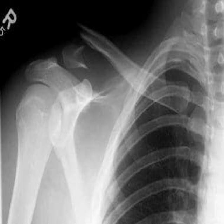

In [33]:
img


In [34]:

x=image.img_to_array(img)
x


array([[[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        ...,
        [175., 175., 175.],
        [182., 182., 182.],
        [175., 175., 175.]],

       [[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        ...,
        [201., 201., 201.],
        [190., 190., 190.],
        [182., 182., 182.]],

       [[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        ...,
        [214., 214., 214.],
        [203., 203., 203.],
        [192., 192., 192.]],

       ...,

       [[235., 235., 235.],
        [212., 212., 212.],
        [166., 166., 166.],
        ...,
        [250., 250., 250.],
        [250., 250., 250.],
        [250., 250., 250.]],

       [[238., 238., 238.],
        [213., 213., 213.],
        [166., 166., 166.],
        ...,
        [249., 249., 249.],
        [249., 249., 249.],
        [249., 249., 249.]],

       [[232., 232., 232.],
        [211., 211., 211.],
        [167., 1

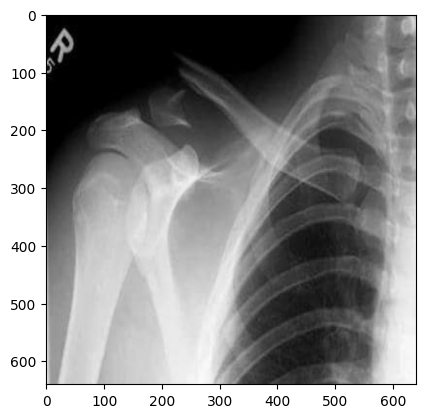

In [35]:
Z = plt.imread('/content/Bones-data/test/Oblique fracture/43390tn_jpg.rf.e82c12a328a56cc66d5d828e638324be.jpg')
plt.imshow(Z)

In [36]:
x.shape

(224, 224, 3)

In [37]:

x=x/255

In [38]:

from keras.applications.vgg16 import preprocess_input
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)


In [39]:
img_data


array([[[[-103.939   , -116.779   , -123.68    ],
         [-103.939   , -116.779   , -123.68    ],
         [-103.939   , -116.779   , -123.68    ],
         ...,
         [-103.25273 , -116.09273 , -122.99373 ],
         [-103.22528 , -116.06528 , -122.96628 ],
         [-103.25273 , -116.09273 , -122.99373 ]],

        [[-103.939   , -116.779   , -123.68    ],
         [-103.939   , -116.779   , -123.68    ],
         [-103.939   , -116.779   , -123.68    ],
         ...,
         [-103.150764, -115.99076 , -122.89176 ],
         [-103.19391 , -116.033905, -122.934906],
         [-103.22528 , -116.06528 , -122.96628 ]],

        [[-103.939   , -116.779   , -123.68    ],
         [-103.939   , -116.779   , -123.68    ],
         [-103.939   , -116.779   , -123.68    ],
         ...,
         [-103.099785, -115.93978 , -122.84078 ],
         [-103.14292 , -115.98292 , -122.88392 ],
         [-103.18606 , -116.026054, -122.927055]],

        ...,

        [[-103.01743 , -115.85743 , -1

In [40]:

output = model.predict(img_data)
output

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[0.03832777, 0.96167225]], dtype=float32)

In [41]:

result = np.argmax(output, axis=1)
result

array([1])

In [42]:

if result[0] == 0:
    prediction = 'Oblique fracture'
    print(prediction)
else:
    prediction = 'Spiral Fracture'
    print(prediction)

Spiral Fracture
